In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('transactions_n100000.csv')

In [3]:
df

,ticket_id,order_timestamp,location,item_name,item_count,lat,long
0,0x872a40,2019-02-28 18:33:00,4,shake,2,41.889047,-87.803605
1,0x872a40,2019-02-28 18:33:00,4,burger,2,41.889047,-87.803605
2,0x872a40,2019-02-28 18:33:00,4,fries,2,41.889047,-87.803605
3,0x598eb3,2019-09-18 11:59:00,5,burger,1,41.881818,-87.640234
4,0x598eb3,2019-09-18 11:59:00,5,salad,2,41.881818,-87.640234
...,...,...,...,...,...,...,...
260736,0x3c0582,2019-05-27 17:06:00,9,burger,3,41.524598,-87.849468
260737,0x3c0582,2019-05-27 17:06:00,9,salad,1,41.524598,-87.849468
260738,0x3c0582,2019-05-27 17:06:00,9,fries,4,41.524598,-87.849468
260739,0x104597,2019-12-10 00:25:00,2,burger,3,42.049306,-87.677606


In [4]:
df['item_name'].value_counts()

fries     100000
burger     76114
shake      46283
salad      38344
Name: item_name, dtype: int64

In [5]:
ticket_list = df['ticket_id'].unique()

In [13]:
df_1 = pd.DataFrame(ticket_list,columns = ['ticket_id'])

In [14]:
df_1.set_index(["ticket_id"], inplace=True)

In [15]:
from time import sleep
from tqdm import tqdm

In [16]:
# df_1 = pd.DataFrame(columns=['ticket_id', 'order_timestamp', 'location', 'fries','burger','shake','salad','lat','long'])
n = 0

for i in tqdm(range(df.shape[0])):
#for i in range(10):
    ticket = df.loc[i,'ticket_id']
    df_1.loc[ticket,'ticket_id'] = df.loc[i,'ticket_id']
    df_1.loc[ticket, 'order_timestamp'] = df.loc[i,'order_timestamp']
    df_1.loc[ticket, 'location'] = df.loc[i,'location']
    df_1.loc[ticket, 'lat'] = df.loc[i,'lat']
    df_1.loc[ticket, 'long'] = df.loc[i,'long']
    if df.loc[i,'item_name'] == 'fries':
        df_1.loc[ticket, 'fries'] = 1
        df_1.loc[ticket, 'fries_count'] = df.loc[i,'item_count']
    if df.loc[i,'item_name'] == 'burger':
        df_1.loc[ticket, 'burger'] = 1
        df_1.loc[ticket, 'burger_count'] = df.loc[i,'item_count']
    if df.loc[i,'item_name'] == 'shake':
        df_1.loc[ticket, 'shake'] = 1
        df_1.loc[ticket, 'shake_count'] = df.loc[i,'item_count']
    if df.loc[i,'item_name'] == 'salad':
        df_1.loc[ticket, 'salad'] = 1
        df_1.loc[ticket, 'salad_count'] = df.loc[i,'item_count']
    sleep(0.01)
sleep(0.5)

100%|██████████| 260741/260741 [8:16:37<00:00,  8.75it/s]      


In [17]:
df_1

,ticket_id,order_timestamp,location,lat,long,shake,shake_count,burger,burger_count,fries,fries_count,salad,salad_count
ticket_id,,,,,,,,,,,,,
0x872a40,0x872a40,2019-02-28 18:33:00,4.0,41.889047,-87.803605,1.0,2.0,1.0,2.0,1.0,2.0,NaN,NaN
0x598eb3,0x598eb3,2019-09-18 11:59:00,5.0,41.881818,-87.640234,NaN,NaN,1.0,1.0,1.0,3.0,1.0,2.0
0x5646c2,0x5646c2,2019-09-21 12:40:00,3.0,41.884490,-87.627059,NaN,NaN,NaN,NaN,1.0,3.0,1.0,3.0
0x4022cf,0x4022cf,2019-09-21 12:25:00,4.0,41.889047,-87.803605,NaN,NaN,NaN,NaN,1.0,4.0,1.0,4.0
0x7a39d9,0x7a39d9,2019-09-05 17:21:00,7.0,41.794132,-88.010140,1.0,5.0,1.0,5.0,1.0,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x75c9e7,0x75c9e7,2019-10-27 01:17:00,6.0,41.784576,-87.607565,NaN,NaN,1.0,2.0,1.0,2.0,NaN,NaN
0x66f1df,0x66f1df,2019-10-05 23:59:00,6.0,41.784576,-87.607565,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN
0x4e2756,0x4e2756,2019-10-12 16:29:00,8.0,41.894202,-87.620965,1.0,4.0,1.0,4.0,1.0,4.0,NaN,NaN


In [18]:
df_1.to_csv('hw2_newdata.csv', index = False)

In [23]:
hw2_df = pd.read_csv('hw2_newdata.csv')

In [24]:
def time_transter(time):
    
    time = time[-8:-6]
    
    return time

In [25]:
hw2_df['order_timestamp'] = list(map(time_transter,hw2_df['order_timestamp'].tolist()))

In [26]:
def time_group(time):
    
    time = int(time)
    
    if (time >= 11) and (time <14 ):
        time = 1
    elif (time >= 14) and (time <17 ):
        time = 2
    elif (time >= 17) and (time <21 ):
        time = 3
    elif (time >= 21) or (time <5 ):
        time = 4
        
    return time

In [27]:
hw2_df['order_timestamp'] = list(map(time_group,hw2_df['order_timestamp'].tolist()))

In [28]:
hw2_df.head()

,ticket_id,order_timestamp,location,lat,long,shake,shake_count,burger,burger_count,fries,fries_count,salad,salad_count
0,0x872a40,3,4.0,41.889047,-87.803605,1.0,2.0,1.0,2.0,1.0,2.0,NaN,NaN
1,0x598eb3,1,5.0,41.881818,-87.640234,NaN,NaN,1.0,1.0,1.0,3.0,1.0,2.0
2,0x5646c2,1,3.0,41.884490,-87.627059,NaN,NaN,NaN,NaN,1.0,3.0,1.0,3.0
3,0x4022cf,1,4.0,41.889047,-87.803605,NaN,NaN,NaN,NaN,1.0,4.0,1.0,4.0
4,0x7a39d9,3,7.0,41.794132,-88.010140,1.0,5.0,1.0,5.0,1.0,5.0,NaN,NaN


In [119]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

hw2_df.fillna(0,inplace = True)
X = hw2_df.drop(columns=['ticket_id'])

kmeans = KMeans(n_clusters=4)
res = kmeans.fit(X)
print(res)

y = res.predict(X)
y = y.tolist()
X['group'] = y

X

KMeans(n_clusters=4)


,order_timestamp,location,lat,long,shake,shake_count,burger,burger_count,fries,fries_count,salad,salad_count,group
0,3,4.0,41.889047,-87.803605,1.0,2.0,1.0,2.0,1.0,2.0,0.0,0.0,1
1,1,5.0,41.881818,-87.640234,0.0,0.0,1.0,1.0,1.0,3.0,1.0,2.0,3
2,1,3.0,41.884490,-87.627059,0.0,0.0,0.0,0.0,1.0,3.0,1.0,3.0,3
3,1,4.0,41.889047,-87.803605,0.0,0.0,0.0,0.0,1.0,4.0,1.0,4.0,3
4,3,7.0,41.794132,-88.010140,1.0,5.0,1.0,5.0,1.0,5.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,6.0,41.784576,-87.607565,0.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,0
99996,4,6.0,41.784576,-87.607565,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0
99997,2,8.0,41.894202,-87.620965,1.0,4.0,1.0,4.0,1.0,4.0,0.0,0.0,2
99998,3,9.0,41.524598,-87.849468,1.0,3.0,1.0,3.0,1.0,4.0,1.0,1.0,2


In [142]:
X['order_timestamp'].value_counts()

4    34268
3    31511
1    29338
2     4883
Name: order_timestamp, dtype: int64

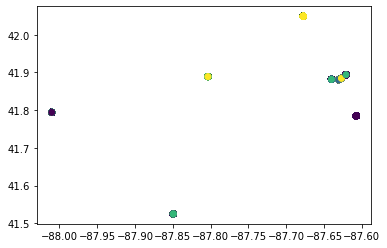

In [57]:
plt.scatter(X.iloc[:,3],X.iloc[:,2],c = y)
plt.show()

In [127]:
time_list = X['order_timestamp'].unique()
item_list = ['shake_count','burger_count','fries_count','salad_count']
#item_list = ['shake','burger','fries','salad_count']

In [121]:
df_g1 = X[X['group'] == 0]
df_g2 = X[X['group'] == 1]
df_g3 = X[X['group'] == 2]
df_g4 = X[X['group'] == 3]

#df_g1.dropna(inplace = True)
#df_g2.dropna(inplace = True)
#df_g3.dropna(inplace = True)
#df_g4.dropna(inplace = True)

In [124]:
df_g1.shape[0]+df_g2.shape[0]+df_g3.shape[0]+df_g4.shape[0]

100000

In [128]:
group_list = [df_g1,df_g2,df_g3,df_g4]

i = 0
for group in group_list:
    for time in time_list:
        for item in item_list:
            condition = group['order_timestamp'] == time
            print(i,time,item,group.where(condition)[item].sum())
    i +=1

0 3 shake_count 5726.0
0 3 burger_count 6153.0
0 3 fries_count 7586.0
0 3 salad_count 1433.0
0 1 shake_count 1131.0
0 1 burger_count 3349.0
0 1 fries_count 20179.0
0 1 salad_count 16830.0
0 4 shake_count 4051.0
0 4 burger_count 22747.0
0 4 fries_count 23877.0
0 4 salad_count 1130.0
0 2 shake_count 518.0
0 2 burger_count 782.0
0 2 fries_count 2475.0
0 2 salad_count 1693.0
1 3 shake_count 7118.0
1 3 burger_count 7878.0
1 3 fries_count 8668.0
1 3 salad_count 790.0
1 1 shake_count 195.0
1 1 burger_count 495.0
1 1 fries_count 497.0
1 1 salad_count 2.0
1 4 shake_count 5179.0
1 4 burger_count 28641.0
1 4 fries_count 29513.0
1 4 salad_count 872.0
1 2 shake_count 517.0
1 2 burger_count 641.0
1 2 fries_count 691.0
1 2 salad_count 50.0
2 3 shake_count 88951.0
2 3 burger_count 93547.0
2 3 fries_count 97354.0
2 3 salad_count 3807.0
2 1 shake_count 61.0
2 1 burger_count 97.0
2 1 fries_count 151.0
2 1 salad_count 54.0
2 4 shake_count 2376.0
2 4 burger_count 8526.0
2 4 fries_count 8683.0
2 4 salad_cou

In [129]:
location_list = X['location'].unique()

In [133]:

for group in group_list:
    print(group['location'].value_counts())
        
    

6.0    13084
8.0     7783
9.0     4043
7.0     3800
5.0     1309
Name: location, dtype: int64
2.0    13886
4.0     2774
1.0     2387
3.0     1572
5.0       25
Name: location, dtype: int64
7.0    7409
9.0    7362
4.0    7176
6.0    2179
8.0    1179
5.0     911
3.0     617
2.0     567
1.0     173
Name: location, dtype: int64
3.0    6502
1.0    6122
5.0    6062
4.0    1388
2.0    1318
6.0     344
7.0      28
Name: location, dtype: int64


In [141]:
X[['lat','long','location']].drop_duplicates().to_csv('location.csv')